In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import numpy as np
import cv2
import argparse
import matplotlib.pyplot as plt
import math

In [2]:
def akaze_detect(img1, img2):
    gray_img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    gray_img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)    

    akaze_detector = cv2.AKAZE_create()
    (kps1, descs1) = akaze_detector.detectAndCompute(gray_img1, None)
    (kps2, descs2) = akaze_detector.detectAndCompute(gray_img2, None)

    print("keypoints: {}, descriptors: {}".format(len(kps1), descs1.shape))
    print("keypoints: {}, descriptors: {}".format(len(kps2), descs2.shape)) 
    return kps1, descs1, kps2, descs2

In [3]:
def bf_opencv_matcher(kps1, descs1, kps2, descs2,img1, img2):
    bf = cv2.BFMatcher(cv2.NORM_HAMMING)
    matches = bf.knnMatch(descs1,descs2, k=2)    # typo fixed

    # Apply ratio test
    good = []
    for m,n in matches:
        if m.distance < 0.9*n.distance:
            good.append([m])

    # cv2.drawMatchesKnn expects list of lists as matches.
    img3 = cv2.drawMatchesKnn(img1, kps1, img2, kps2, good[1:10], None, flags=2)
    plt.imshow(img3), plt.show()
    cv2.imshow("AKAZE matching bf", img3)
    cv2.waitKey(0) 


In [4]:
def hamming_dist(x,y):
    n = len(x)
    assert len(x) == len(y)
    return sum([bin(x[i] ^ y[i]).count("1") for i in range(n)])

In [5]:
def own_mathcher(kps1, descs1, kps2, descs2,img1, img2):
    matches = []
    for i, k1 in enumerate(descs1):
        for j, k2 in enumerate(descs2):
            matches.append(cv2.DMatch(_distance=hamming_dist(k1,k2), _imgIdx=0, _queryIdx=i,
    _trainIdx=j))
            
    matches = sorted(matches, key = lambda x : x.distance)
    img3 = cv2.drawMatches(img1, kps1, img2, kps2, matches[:10], None,
    flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
    plt.imshow(img3), plt.show()
    cv2.imshow("AKAZE matching own", img3)
    cv2.waitKey(0) 

In [6]:
img1 = cv2.imread("lab_2_img_1.jpg")
img2 = cv2.imread("lab_2_img_2.jfif")

kps1, descs1, kps2, descs2 = akaze_detect(img1, img2)

keypoints: 835, descriptors: (835, 61)
keypoints: 92, descriptors: (92, 61)


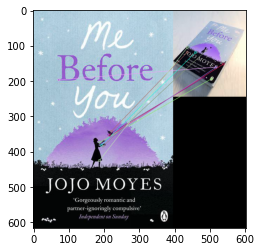

In [7]:
bf_opencv_matcher(kps1, descs1, kps2, descs2,img1, img2)

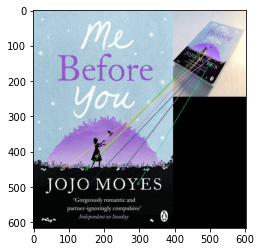

In [8]:
own_mathcher(kps1, descs1, kps2, descs2,img1,img2)

In [9]:
img1 = cv2.imread("lab_2_img_1.jpg")
img2 = cv2.imread("lab_2_img_3.jpg")

kps1, descs1, kps2, descs2 = akaze_detect(img1, img2)

keypoints: 835, descriptors: (835, 61)
keypoints: 1252, descriptors: (1252, 61)


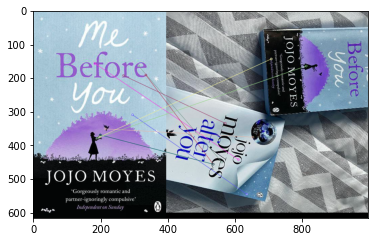

In [10]:
bf_opencv_matcher(kps1, descs1, kps2, descs2,img1, img2)

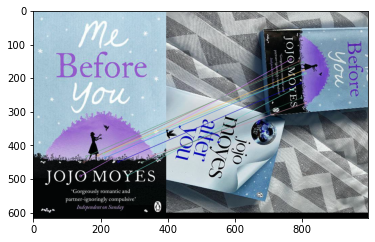

In [11]:
own_mathcher(kps1, descs1, kps2, descs2,img1,img2)

In [6]:
img1 = cv2.imread("lab_2_img_4.jpg")
img2 = cv2.imread("lab_2_img_5.jpg")

kps1, descs1, kps2, descs2 = akaze_detect(img1, img2)

keypoints: 658, descriptors: (658, 61)
keypoints: 653, descriptors: (653, 61)


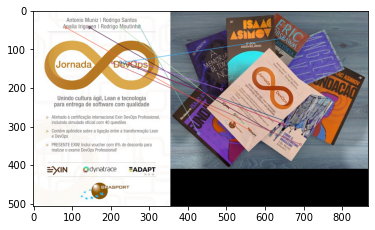

In [13]:
bf_opencv_matcher(kps1, descs1, kps2, descs2,img1, img2)

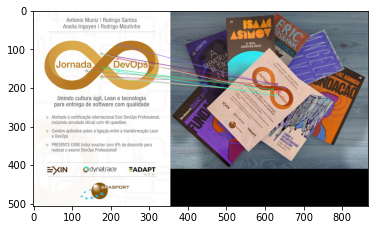

In [7]:
own_mathcher(kps1, descs1, kps2, descs2,img1,img2)